### Módulo 3: Ecuaciones Diferenciales Ordinarias (ODEs)

Se llama ecuación diferencial ordinaria (E.D.O., por sus siglas en inglés) a una ecuación que relaciona una variable independiente x, una función desconocida y(x).

#### Ejercicio.

La cinética de formación de AFA y 6-APA a partir de penicilina G puede describirse de manera general mediante una reacción de primer orden, donde la velocidad de reacción depende de la concentración de penicilina G y la actividad de la enzima o catalizador presente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#### Cinética de primer orden.

$$\frac{d[A]}{dt} = - \left( k_1 \cdot [A] + k_2\cdot [A] \right)$$ 

$$\frac{d[B]}{dt} = -k_1 \cdot [A]$$ 

$$\frac{d[C]}{dt} = -k_1 \cdot [A]$$ 

Donde:

 - A es la concentración del sustrato (g/L).
 - B y C, son las concentraciones de los productos (g/L).
 - $k_1$ y $k_2$ son constantes cinéticas

In [6]:
# Parámetros de la cinética de primer orden
k_AFA = 0.002  # Constante de velocidad de formación de AFA (1/seg)
k_APA = 0.001  # Constante de velocidad de formación de 6-APA (1/seg)
P0 = 500       # Concentración inicial de penicilina G (mol/m^3)

In [7]:
# Definir las ecuaciones diferenciales
def first_order_reaction(C, t):
    P, AFA, APA = C
    dP_dt = -(k_AFA + k_APA) * P
    dAFA_dt = k_AFA * P
    dAPA_dt = k_APA * P
    return [dP_dt, dAFA_dt, dAPA_dt]

# Intervalo de tiempo y condiciones iniciales
t_span = np.linspace(0,8500, 100)
initial_conditions = [P0, 0, 0]  # [Penicilina G, AFA, 6-APA]

# Resolver ODE
results = odeint(first_order_reaction, initial_conditions, t_span)

# Extraer resultados
#P, AFA, APA = results.T
#P = results[:,0]
df = pd.DataFrame({'t_span':t_span,'P': results[:,0],
        'AFA': results[:,1],'APA': results[:,2]})

P = df['P']
AFA = df['AFA']
APA = df['APA']

#print(df)

In [ ]:
# Graficar los resultados
plt.figure(figsize=(6, 4))
plt.plot(t_span, P, 'b-', label='Penicilina G', linewidth=2)
plt.plot(t_span, AFA, 'r--', label='AFA', linewidth=2)
plt.plot(t_span, APA, 'g:', label='6-APA', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/m^3)')
plt.title('Cinética de Formación de AFA y 6-APA a partir de Penicilina G')
plt.legend()
plt.grid(True)
plt.show()

#Selectividad y rendimiento
s_AFA = k_AFA/(k_AFA + k_APA) * 100
print(f'El porcentaje de selectividad del proceso con respecto a la formación de AFA es {s_AFA:.3f}% \n')

Y_AFA = AFA[len(AFA)-1]/P[0]
print(f'El rendimiento del proceso con respecto a la formación de AFA es {Y_AFA:.3f}')

### Cinética de Michaelis-Menten

$$\frac{d[A]}{dt} = -\left(\frac{V_{max,B}\cdot [A]}{K_{m,B} + [A]} + \frac{V_{max,C}\cdot [A]}{K_{m,C} + [A]}\right)$$ 

$$\frac{d[B]}{dt} = \frac{V_{max,B}\cdot [A]}{K_{m,B} + [A]}$$ 

$$\frac{d[C]}{dt} = \frac{V_{max,C}\cdot [A]}{K_{m,C} + [A]}$$ 

Donde:

 - A es la concentración del sustrato (g/L).
 - B y C, son las concentraciones de los productos (g/L)
 - $V_{max}$  es la velocidad máxima de la reacción cuando la enzima está completamente saturada con el sustrato.
 - [S] es la concentración de sustrato.
 - $K_m$  es la constante de Michaelis-Menten, que representa la afinidad de la enzima con el sustrato.

In [2]:
# Parámetros de la reacción Michaelis-Menten
Vmax_AFA = 0.05  # Velocidad máxima para la formación de AFA (mol/m^3*s)
Vmax_APA = 0.03  # Velocidad máxima para la formación de 6-APA (mol/m^3*s)
Km_AFA = 10      # Constante de Michaelis-Menten para la formación de AFA (mol/m^3)
Km_APA = 8       # Constante de Michaelis-Menten para la formación de 6-APA (mol/m^3)
P0 = 500         # Concentración inicial de penicilina G (mol/m^3)

In [3]:
# Definir las ecuaciones diferenciales
def michaelis_menten(C, t):
    P_2, AFA_2, APA_2 = C
    dP_dt_2 = -((Vmax_AFA * P_2 / (Km_AFA + P_2)) + (Vmax_APA * P_2 / (Km_APA + P_2)))
    dAFA_dt_2 = Vmax_AFA * P_2 / (Km_AFA + P_2)
    dAPA_dt_2 = Vmax_APA * P_2 / (Km_APA + P_2)
    return [dP_dt_2, dAFA_dt_2, dAPA_dt_2]

# Intervalo de tiempo y condiciones iniciales
t_span = np.linspace(0,8500, 100)
initial_conditions = [P0, 0, 0]  # [Penicilina G, AFA, 6-APA]

# Resolver ODE
initial_conditions = [P0, 0, 0]
results = odeint(michaelis_menten, initial_conditions, t_span)

# Extraer resultados
#P_2, AFA_2, APA_2 = results.T

df = pd.DataFrame({'t_span':t_span,'P_2': results[:,0],
        'AFA_2': results[:,1],'APA_2': results[:,2]})

P_2 = df['P_2']
AFA_2 = df['AFA_2']
APA_2 = df['APA_2']

#print(df)

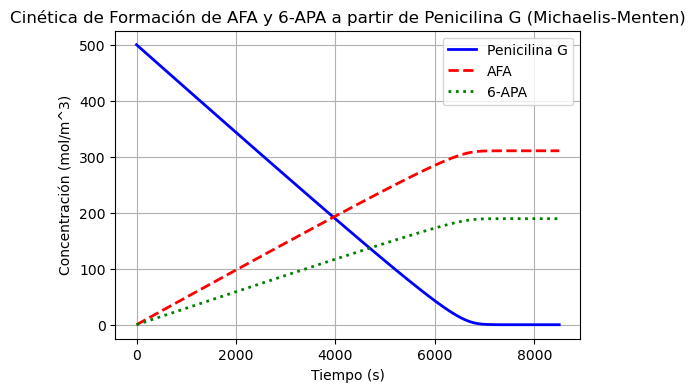

El porcentaje de selectividad del proceso con respecto a la formación de AFA es 62.119% 

El rendimiento del proceso con respecto a la formación de AFA es 0.621


In [4]:
# Graficar los resultados
plt.figure(figsize=(6, 4))
plt.plot(t_span, P_2, 'b-', label='Penicilina G', linewidth=2)
plt.plot(t_span, AFA_2, 'r--', label='AFA', linewidth=2)
plt.plot(t_span, APA_2, 'g:', label='6-APA', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/m^3)')
plt.title('Cinética de Formación de AFA y 6-APA a partir de Penicilina G (Michaelis-Menten)')
plt.legend()
plt.grid(True)
plt.show()

#Selectividad y rendimiento
#s_AFA_2 = Km_AFA/(Km_AFA + Km_APA) * 100 #Incorrecto, explicar
s_AFA_2 =  AFA_2[len(AFA_2)-1]/( AFA_2[len(AFA_2)-1] +  APA_2[len(APA_2)-1]) * 100
print(f'El porcentaje de selectividad del proceso con respecto a la formación de AFA es {s_AFA_2:.3f}% \n')

Y_AFA_2 = AFA_2[len(AFA_2)-1]/P_2[0]
print(f'El rendimiento del proceso con respecto a la formación de AFA es {Y_AFA_2:.3f}')

### Comparación de modelos

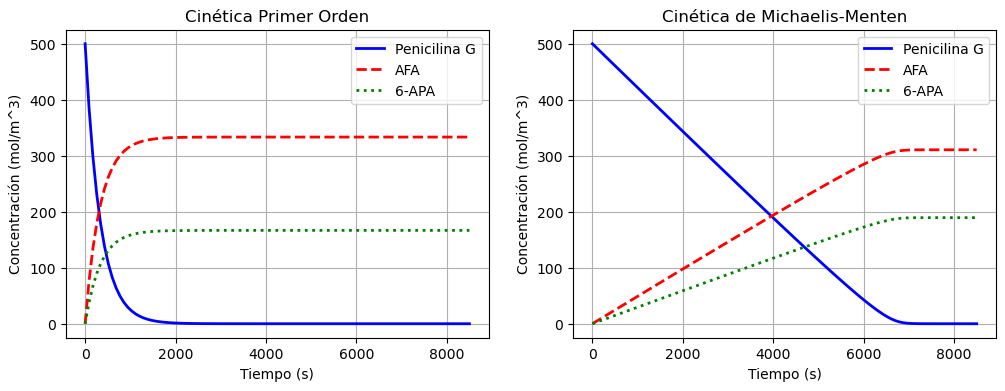

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(t_span, P, 'b-', label='Penicilina G', linewidth=2)
plt.plot(t_span, AFA, 'r--', label='AFA', linewidth=2)
plt.plot(t_span, APA, 'g:', label='6-APA', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/m^3)')
plt.title('Cinética Primer Orden')
plt.legend()
plt.grid(True)
#----------------------------------------------------------------------------
plt.subplot(1,2,2)
plt.plot(t_span, P_2, 'b-', label='Penicilina G', linewidth=2)
plt.plot(t_span, AFA_2, 'r--', label='AFA', linewidth=2)
plt.plot(t_span, APA_2, 'g:', label='6-APA', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/m^3)')
plt.title('Cinética de Michaelis-Menten')
plt.legend()
plt.grid(True)